In [1]:
# 출력이 너무 길어지지 않게하기 위해 찍지 않도록 했으나 
# 실제 학습 할 때는 아래 두 줄을 주석처리 하는 것을 권장한다.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
print(pd.__version__)
print(np.__version__)

1.1.0
1.18.5


In [3]:
# pandas 설정: 모든 row와 모든 column을 출력하게 하고, 각 column 별 출력되는 글자수는 50자 이내
pd.set_option('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', 50)

In [4]:
# 위의 설정으로 간단하게 보는 df_specific
df_specific = pd.read_csv("./data_wrangled/df_specific_wrangle.csv", encoding="utf-8")
df_specific.head(2)

,대학코드,대학명,gen_info,env_info,food_info,study_info,office_info,facil_info,mhct_info,help_info,etc_info
0,AR000004,Universidad del Salvador,아르헨티나의 대다수 대학교는 한국처럼 캠퍼스가 있는 것이 아니라 도시 내에 몇개의 ...,대학교가 도시 여러곳에 분포하고 있으므로 각기 다르다. 하지만 남녀를 불문하고 부에...,기숙사는 학교에서 제공하지 않고 두가지 옵션이 주어진다. 홈스테이 혹은 게스트 하우...,아르헨티나에서의 대학 수업은 주로 오전 혹은 저녁에 있다. 대부분의 학생들이 일을하...,EL SALVADOR대학교는 국제 교육부가 잘 되있는 학교이다. 아르헨티나 대학교들...,부대시설로는 헬스장이 있다고 알고 있으나 시내와 먼 곳에 있었다. 동아리는 몇가지 ...,딱히 컬쳐쇼크를 받을 만 한 요소는 없었던 것 같다. 하지만 처음에 언어적인 면에서...,"살바도르 대학교 국제처에서 비자문제나 숙소문제(홈스테이경우) 등은 해결해 주고, 특...",NaN
1,AU000019,Australian National University,"ANU has a very big campus, but unlike Yonsei, ...","The city center, called CIVIC, is 20min walk a...","There are many housing options, but I chose to...","In my personal opinions, classes are generally...","Overall, I did not have to ask for help much f...","There were many clubs for you to join at ANU, ...",I did have some culture shock during my first ...,"I was helped a lot, especially during the firs...","Overall, my stay in Australia has been nothing..."


In [5]:
# 위의 설정으로 간단하게 보는 df_specific
df_specific.tail(2)

,대학코드,대학명,gen_info,env_info,food_info,study_info,office_info,facil_info,mhct_info,help_info,etc_info
468,US000274,Whitworth College,내가 다녀온 교환대학은 Washington State 에 위치한 Whitworth ...,Whitworth College는 Seattle에서 비행기로 40분 정도 떨어져 있...,나는 Whitworth College에서 기숙사에 살았다. ISEP으로 가게 되면 ...,내가 미국에 가기 전에 가장 두려워했던 것은 바로 수업이었다. 어학연수와는 달리 교...,이 학교에서 내가 마음 편하게 지낼 수 있었던 것은 국제교육부 스텝들이 너무 따뜻하...,"기타 학교의 부대 시설로는 fitness center, music hall, soc...",NaN,NaN,처음에 Whitworth College를 ISEP으로부터 배정 받았을 때 현실적으로...
469,US000278,Wittenberg University,Wittenberg는 Ohio주의 작은 도시 Springfield에 위치해 있다. ...,"Springfield의 downtown에는 우체국, 은행(huntington) 정도...","1,2학년과 국제학생들 (1년 이하로 있는 학생들)은 모두 기숙사에서 생활하게 된다...",도서관은 Thomas library가 main이고 다른 단과대학 건물에 독서실이 있...,"국제교류부는 Hollenbeck 건물 1층에 있는데, Joann 과 Betsy 두 ...",Wittenberg의 가장 큰 장점. nWittenberg는 학비가 무척 비싼 학교...,"한국에서는 흔치 않은 gay, lesbian, transgender 등을 만날 수 ...",Wittenberg는 국제학생들에게 host family를 붙여준다. 비록 같이 살...,이처럼 wittenberg는 시골에 있는 작은 학교지만 지리적인 위치로 인한 단점보...


In [6]:
print(df_specific.columns)
print(df_specific.shape)

Index(['대학코드', '대학명', 'gen_info', 'env_info', 'food_info', 'study_info',
       'office_info', 'facil_info', 'mhct_info', 'help_info', 'etc_info'],
      dtype='object')
(470, 11)


In [7]:
# pandas 설정: 각 column 별 (혹은 한 cell에서) 출력되는 글자수 제한을 없애기
pd.set_option('display.max_colwidth', None)

In [8]:
import re
# removing junks from the string data
def remove_junk(str_data):
    str_data = str_data.replace("\\\\n", "")
    str_data = str_data.replace("\\n", "")
    str_data = str_data.replace("\n", "")
    str_data = str_data.replace("\\", "")
    str_data = str_data.replace("\\t", "")
    str_data = str_data.replace("NaN", "")

    # print(str_data) makes an error. too much of data
    # 한글, english 빼고 전부 날리기
    # str_data = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z|0-9|.,]', ' ', str_data)

    # 한글 빼고 다 날리기
    str_data = re.sub('[^가-힣ㄱ-ㅎㅏ]', ' ', str_data)

    # replace multiple spaces into single space
    str_data = ' '.join(str_data.split())
    return str_data

In [9]:
# accessing university info of given column (= accessing one cell)
def access_univ_info(dataframe, column, univ_code):
    df_row = dataframe.loc[dataframe["대학코드"] == univ_code]
    str_univ_info = df_row[column].to_string(index=False).lstrip()
    str_univ_info = remove_junk(str_univ_info)
    return str_univ_info

In [10]:
column_data = "gen_info"
univ_code = "DK000003"
str_example = access_univ_info(df_specific, column_data, univ_code)
str_example[:100]

'코펜하겐 대학교는 자연과학캠퍼스 인문캠퍼스 등 코펜하겐 시내 곳곳에 흩어져 있습니다 저는 조경건축 수업을 듣기 위해 에 위치한 자연과학 캠퍼스도 다니고 덴마크어 수업과 미디어커뮤니'

In [11]:
# collecting all column values into one string
def column_to_string(dataframe, column_name: str):
    str_corpus = dataframe[column_name].to_string(index=False).lstrip()
    str_corpus = remove_junk(str_corpus)
    return str_corpus

In [12]:
# collecting all column values into one string
corpus = column_to_string(df_specific, column_data)
print("글자수:", len(corpus))
corpus[:100]

글자수: 3985044


'아르헨티나의 대다수 대학교는 한국처럼 캠퍼스가 있는 것이 아니라 도시 내에 몇개의 건물이 대학교 건물이라서 수업에 맞는 건물로 수업을 들으러 가면 된다 도시의 대중교통이 꽤 잘 되'

In [13]:
info_list = ['gen_info', 'env_info', 'food_info', 'study_info', 'office_info', 'facil_info', 'mhct_info', 'help_info', 'etc_info']

In [63]:
# count how many letters are tehre for each combined columns
"""
for info in info_list:
    corpus_sample = column_to_string(df_specific, info)
    print(info, len(corpus_sample))
"""

"""
gen_info 3985044
env_info 3316342
food_info 4212609
study_info 3970047
office_info 2022400
facil_info 2832921
mhct_info 2307935
help_info 1582255
etc_info 2521724
"""
print("")

## Tokenizing Sample Corpus

In [15]:
stopwords = []

In [16]:
# https://github.com/lovit/soynlp
from soynlp.tokenizer import RegexTokenizer, LTokenizer

tokenizer = LTokenizer()
tokenizer

In [17]:
column_data = "env_info"
# collecting all column values into one string
corpus = column_to_string(df_specific, column_data)
print("글자수:", len(corpus))
print(corpus[:100])

글자수: 3316342
대학교가 도시 여러곳에 분포하고 있으므로 각기 다르다 하지만 남녀를 불문하고 부에노스 아이레스에서 밤에 혼자 다니는 것은 위험하다 낮에는 대체적으로 사람들이 많이 다니므로 위험하지


In [18]:
# corpus is info column converted into one string
tokenized_corpus = tokenizer.tokenize(corpus)
print(f"number of tokenized words in a corpus are: {len(tokenized_corpus)}")
print(tokenized_corpus[:10])

number of tokenized words in a corpus are: 849199
['대학교가', '도시', '여러곳에', '분포하고', '있으므로', '각기', '다르다', '하지만', '남녀를', '불문하고']


In [19]:
from collections import Counter

In [20]:
tokenized_corpus_counted = Counter(tokenized_corpus)
print("number of counted words:", len(tokenized_corpus_counted))
common_words = tokenized_corpus_counted.most_common(300)
print(common_words)

number of counted words: 90231
[('수', 14856), ('있습니다', 12950), ('있는', 9087), ('학교', 7678), ('있고', 5146), ('때문에', 4994), ('분', 4895), ('있다', 4673), ('이', 4366), ('많이', 3986), ('큰', 3600), ('타고', 3595), ('있는데', 3354), ('갈', 3238), ('있어서', 3175), ('라는', 3064), ('그', 3016), ('가', 2890), ('버스를', 2778), ('정도', 2654), ('그리고', 2640), ('캠퍼스', 2553), ('바로', 2448), ('등', 2441), ('에', 2427), ('는', 2421), ('하지만', 2419), ('학교에서', 2394), ('있어', 2384), ('대학', 2379), ('매우', 2370), ('같은', 2368), ('것', 2332), ('할', 2302), ('등이', 2247), ('작은', 2159), ('가장', 2121), ('정말', 2058), ('거리에', 2052), ('주변에', 1993), ('를', 1987), ('한', 1980), ('많은', 1958), ('더', 1934), ('다', 1911), ('가면', 1899), ('잘', 1821), ('걸어서', 1755), ('자주', 1749), ('거의', 1744), ('다른', 1717), ('것이', 1712), ('좋은', 1710), ('에서', 1702), ('또한', 1694), ('주로', 1658), ('주변에는', 1623), ('저는', 1575), ('볼', 1513), ('때', 1497), ('합니다', 1494), ('와', 1485), ('조금', 1467), ('근처에', 1464), ('학생들이', 1464), ('있기', 1441), ('없습니다', 1427), ('위치해', 1392), ('가까운', 138

In [21]:
common_words_list, frequency_list = map(list, zip(*common_words))
print(common_words_list[:10])

['수', '있습니다', '있는', '학교', '있고', '때문에', '분', '있다', '이', '많이']


In [22]:
# removing possible significant words from common words
def filter_stopwords():
    stopwords_candidates = []

    for info in info_list:
        # info column series
        df_info = df_specific[info].fillna("")
        print(df_info.shape)
        
        # info column converted into one string
        corpus = column_to_string(df_specific, info)
        tokenized_corpus = tokenizer.tokenize(corpus)
        print(tokenized_corpus[:10])
        print(f"number of tokenized words in a corpus are: {len(tokenized_corpus)}")

        tokenized_corpus_counted = Counter(tokenized_corpus)
        print("number of counted words:", len(tokenized_corpus_counted))

        common_words = tokenized_corpus_counted.most_common(300)
        common_words_list, frequency_list = map(list, zip(*common_words))
        print(common_words_list[:10])    

        stopwords_candidates += common_words_list
        print(len(stopwords_candidates))

        for i in stopwords_candidates:
            if df_info.str.contains(i).sum() < 120:
                print(f"{i} word not appear in less than 1/4 of universities")
                stopwords_candidates.remove(i)
        
        print(len(stopwords_candidates))
        print(f"{random.sample(stopwords_candidates,10)} are random stopwords candidates")
        
        stopwords = stopwords_candidates
        
        with open("file.txt", "wt", encoding="UTF8") as output:
            output.write(stopwords)

In [53]:
# read stopwords genarated from filter_stopwords() function
stopwords_file = open('stopwords_kr.txt','rt', encoding='UTF8')
stopwords_txt = stopwords_file.read()
stopwords_list = stopwords_txt.strip('').split(', ')

# get human selected stopwords
stopwords_nogada_file = open('stopwords_nogada.txt','rt', encoding='UTF8')
stopwords_nogada_txt = stopwords_nogada_file.read()
stopwords_nogada = stopwords_nogada_txt.strip('').split(', ')

stopwords_list = stopwords_list + stopwords_nogada

print(f"total {len(stopwords_list)} number of stopwords available")
print(stopwords_list[:3], stopwords_list[-4:])

total 1842 number of stopwords available
['있습니다', '수', '있는'] ['하다', '않다', '되다', '되어다']


## Tokenizing one column of university dataframe with soynlp

In [24]:
column_data = "env_info"
# df_column = df_specific[df_specific[column_data].notnull()]
df_column = df_specific[column_data].fillna("")

In [25]:
df_column.head(1)[:100]

0    대학교가 도시 여러곳에 분포하고 있으므로 각기 다르다. 하지만 남녀를 불문하고 부에노스 아이레스에서 밤에 혼자 다니는 것은 위험하다. 낮에는 대체적으로 사람들이 많이 다니므로 위험하지 않지만 외진곳은 피하는 것이 좋다. n학교 건물 주변에 편의점이나 공원등이 곳곳이 있으므로 공강시 이용이 편리하다.
Name: env_info, dtype: object

In [26]:
df_column.tail(1)[:100]

469    Springfield의 downtown에는 우체국, 은행(huntington) 정도 밖에 이용할 것이 없어서 쇼핑을 하려면 Columbus에 있는 대형 mall이나 fairfield에 있는 mall을 이용해야 한다. 학교에서 20분 정도 차를 타고 가면 fairborn이라는 작은 도시에 몇몇 한국 마트와 식당이 있어서 가끔 한국 음식이 그리울 때면 찾곤 했었다. springfield에 거주하는 한국인은 단 한명도 없다고 한다. 교환학생으로 파견되었던 나를 포함한 학생 세명이 전부이고, 심지어 옆 도시인 fairborn의 한국 식당에도 한국 사람은 없고, 거의 미국인이다. 화려한 대도시가 아니라서 싫어할 사람들도 있겠지만, 영어만 쓰기에 좋은 환경이고, 아시아인들이 거의 없어서 학교 밖에서도 사람들이 다들 먼저 관심을 보여주기 때문에 1년동안 즐겁게 생활할 수 있었다. n대중교통은 한번도 이용해 본적이 없는데, 버스는 75센트인데 자주 다니지 않아서 주로 차가 있어야 캠퍼스... 학교 주변은 한산한 Springfield 의 한 구석이다. 음악회, 연극 등의 문화행사들은 마을에서보다 학교 안에서 열리는 경우가 더욱 많으며 따라서 주민들이 주말이면 학교로 그런 행사들을 찾아 들어온다. Springfield 시내에 있는 큰 음악회관에서 열리는 정기적인 음악회나 공연 역시 주로 Wittenberg 의 후원 혹은 주최로 열리는 경우가 대부분이다. 마을에 교회들은 교파별로 상당히 다양하게 숫적으로도 많아서 음악을 전공하는 내 룸메이트는 자신이 관심있는 음악을 연주하는 교회들을 찾아서 골라다닐 수도 있을 정도였다. 이곳에 한국인이 거의 살지 않기 때문에, 알아보지는 않았지만 한인교회는 없는 듯 하다. 마을이 큰 화재 이후 상당히 침체되어 젊은 학생들에게는 지루한 곳으로 이야기된다. 그래서 휴일이나 방학 직전만 되면 Wittenberg 의 학생들은 집으로 떠나거나(많은 수의 학생들이 다른 주state 에서 온다. ) 어디로 놀러 갈 것인지가 학생식당에서의 주 관심

In [27]:
df_process = df_column.apply(remove_junk)

In [28]:
%time df_tokens = df_process.apply(tokenizer.tokenize)

CPU times: user 1.63 s, sys: 19.1 ms, total: 1.65 s
Wall time: 1.65 s


In [29]:
df_tokens.shape

(470,)

In [30]:
df_tokens[0:2]

0                                                                                                                                                                                                                                                                                                             [대학교가, 도시, 여러곳에, 분포하고, 있으므로, 각기, 다르다, 하지만, 남녀를, 불문하고, 부에노스, 아이레스에서, 밤에, 혼자, 다니는, 것은, 위험하다, 낮에는, 대체적으로, 사람들이, 많이, 다니므로, 위험하지, 않지만, 외진곳은, 피하는, 것이, 좋다, 학교, 건물, 주변에, 편의점이나, 공원등이, 곳곳이, 있으므로, 공강시, 이용이, 편리하다]
1    [캠퍼스, 자체는, 자연입니다, 정문에서, 걸어서, 분, 정도면, 라고, 생긴지, 얼마, 안된, 큰, 쇼핑센터가, 있구요, 마트, 영화관, 클럽, 등, 전부, 가까워요, 물론, 캔버라, 자체가, 작은, 도시입니다만, 그래서, 기숙사에만, 거주하신다면, 대중교통을, 거의, 이용할, 필요, 없다는, 장점이, 있습니다, 행정, 수도기, 때문에, 웬만한, 것은, 다, 갖추어져있기도, 하구요, 또, 이라는, 커다란, 인공, 호수와, 아주, 가까운데요, 정말, 아름다운, 호수입니다, 조깅, 자전거, 라이딩, 도로를, 따라, 내려가면, 작은, 들판이, 나오는데요, 거기서, 보았던, 노을은, 평생, 잊을, 수, 없을, 듯, 합니다, 대학교, 주변에, 센터가, 있고, 그, 곳에, 술집과, 영화관, 카페, 등이, 있지만, 거기를, 빼고는, 사실, 놀거리가, 많지는, 않습니다, 연세대, 주변, 환경과는, 거의, 반대라는, 점, 감안하시고, 가시길, 바랍니다, 자연을, 좋아하시고, 고요함

In [31]:
df_tokens[-2:]

468          [는, 에서, 비행기로, 분, 정도, 떨어져, 있다, 다시, 말하자면, 에서, 동쪽으로, 그, 정도의, 거리가, 떨어져, 있다는, 것이다, 의, 날씨가, 바다, 때문에, 습하다면, 가, 있는, 이라는, 도시는, 비교적, 건조하다고, 할, 수, 있다, 계절은, 우리, 나라와, 비슷하지만, 여름에도, 별로, 습하지, 않다, 개인적으로, 습한, 날씨를, 싫어했던, 나에게는, 최상의, 날씨였다고, 할, 수, 있다, 겨울엔, 춥지만, 우리, 나라처럼, 강한, 바람을, 동반한, 혹한은, 찾아오지, 않는다, 재미있는, 것은, 그, 곳에서, 첫눈은, 월말에, 왔는데, 날씨는, 별로, 춥지, 않다는, 것이다, 기온의, 변동이, 많지, 않고, 습기가, 별로, 없다는, 점에서, 날씨는, 살아가기에, 매우, 편하다고, 할, 수, 있다, 월에는, 비도, 자주, 왔는데, 그, 곳에는, 우산을, 쓴, 사람을, 찾아보기, 힘들다, 다들, 방수가, 되는, ...]
469    [의, 에는, 우체국, 은행, 정도, 밖에, 이용할, 것이, 없어서, 쇼핑을, 하려면, 에, 있는, 대형, 이나, 에, 있는, 을, 이용해야, 한다, 학교에서, 분, 정도, 차를, 타고, 가면, 이라는, 작은, 도시에, 몇몇, 한국, 마트와, 식당이, 있어서, 가끔, 한국, 음식이, 그리울, 때면, 찾곤, 했었다, 에, 거주하는, 한국인은, 단, 한명도, 없다고, 한다, 교환학생으로, 파견되었던, 나를, 포함한, 학생, 세명이, 전부이고, 심지어, 옆, 도시인, 의, 한국, 식당에도, 한국, 사람은, 없고, 거의, 미국인이다, 화려한, 대도시가, 아니라서, 싫어할, 사람들도, 있겠지만, 영어만, 쓰기에, 좋은, 환경이고, 아시아인들이, 거의, 없어서, 학교, 밖에서도, 사람들이, 다들, 먼저, 관심을, 보여주기, 때문에, 년동안, 즐겁게, 생활할, 수, 있었다, 대중교통은, 한번도, 이용해, 본적이, 없는데, 버스는, 센트인데, 자주, ...]
Name: env_info, dtype: objec

## Extract Keyword
### list of common words in university review(one cell) - list of common words that can be found across rows

In [32]:
# make bag of words out of one university's students' reviews
import random
random_int = random.randint(0,469)
sample_univ_bow = df_tokens[random_int]
print(len(sample_univ_bow))
while len(sample_univ_bow) < 500:
    random_int = random.randint(0,469)
    sample_univ_bow = df_tokens[random_int]
    print(len(sample_univ_bow))
print(df_specific["대학명"][random_int])
sample_univ_bow[:10]

22
1877
Chuo University


['학교가', '도심에서', '좀', '떨어진', '곳에', '있어서', '학교', '주변에서는', '자연', '환경을']

In [33]:
subtracted_bow_list = [item for item in sample_univ_bow if item not in stopwords_list]

In [34]:
counted_bow_keywords = Counter(subtracted_bow_list)
sample_keywords = counted_bow_keywords.most_common(100)
print(sample_keywords)

[('주변에', 13), ('거리에', 9), ('타마', 8), ('주변은', 7), ('정거장', 7), ('걸어서', 7), ('주변', 6), ('캠퍼스', 6), ('주변에는', 6), ('타마센터', 6), ('분정도', 6), ('모노레일로', 6), ('일본의', 5), ('위치하고', 5), ('밭이', 5), ('코라쿠엔', 5), ('주위에', 5), ('등이', 5), ('자전거를', 5), ('걸어가면', 5), ('근처에', 4), ('도쿄돔과', 4), ('도쿄', 4), ('되는데', 4), ('돈키호테', 4), ('캠퍼스는', 4), ('한적한', 4), ('엔', 4), ('편의점', 4), ('가게', 4), ('떨어진', 3), ('모노레일을', 3), ('대학은', 3), ('길에는', 3), ('아니지만', 3), ('편의점도', 3), ('이용할', 3), ('불편한', 3), ('마트', 3), ('싸게', 3), ('불편함은', 3), ('게이오', 3), ('듯', 3), ('가끔', 3), ('개의', 3), ('다니는', 3), ('쇼핑몰', 3), ('불편함이', 3), ('곳이라', 3), ('장을', 3), ('산와', 3), ('싼', 3), ('걸리는', 3), ('자전거로', 3), ('패밀리', 3), ('노래방', 3), ('논과', 3), ('학교가', 2), ('도심에서', 2), ('역에서', 2), ('근처에는', 2), ('가게나', 2), ('정거장만', 2), ('번화가로', 2), ('위치해', 2), ('동물원이', 2), ('예를', 2), ('도쿄에서', 2), ('도쿄돔이', 2), ('상권이나', 2), ('놀이', 2), ('불구하고', 2), ('지나다니는', 2), ('있기에', 2), ('도쿄대', 2), ('신촌과', 2), ('외곽에', 2), ('조용합니다', 2), ('근처', 2), ('타마센터라는', 2), ('곳이나', 2), ('이용하여', 2), (

In [35]:
# zipping deletes overlapping string items
zipped_keywords, frequency_list = map(list, zip(*sample_keywords))
print(zipped_keywords)

['주변에', '거리에', '타마', '주변은', '정거장', '걸어서', '주변', '캠퍼스', '주변에는', '타마센터', '분정도', '모노레일로', '일본의', '위치하고', '밭이', '코라쿠엔', '주위에', '등이', '자전거를', '걸어가면', '근처에', '도쿄돔과', '도쿄', '되는데', '돈키호테', '캠퍼스는', '한적한', '엔', '편의점', '가게', '떨어진', '모노레일을', '대학은', '길에는', '아니지만', '편의점도', '이용할', '불편한', '마트', '싸게', '불편함은', '게이오', '듯', '가끔', '개의', '다니는', '쇼핑몰', '불편함이', '곳이라', '장을', '산와', '싼', '걸리는', '자전거로', '패밀리', '노래방', '논과', '학교가', '도심에서', '역에서', '근처에는', '가게나', '정거장만', '번화가로', '위치해', '동물원이', '예를', '도쿄에서', '도쿄돔이', '상권이나', '놀이', '불구하고', '지나다니는', '있기에', '도쿄대', '신촌과', '외곽에', '조용합니다', '근처', '타마센터라는', '곳이나', '이용하여', '타치카와역', '쇼핑을', '일본', '산', '대학교', '특별한', '별다른', '보통', '되어있다', '정문', '이용하게', '역을', '중심으로', '가게들이', '하게', '환경은', '조용하고', '등은']


### Keywords according to Sentences order

In [36]:
counted_bow = Counter(sample_univ_bow)
counted_bow_tuple_list = list(Counter(counted_bow).items())
print(counted_bow_tuple_list[:50])

[('학교가', 2), ('도심에서', 2), ('좀', 2), ('떨어진', 3), ('곳에', 3), ('있어서', 9), ('학교', 24), ('주변에서는', 1), ('자연', 1), ('환경을', 1), ('감상할', 1), ('수', 20), ('있습니다', 33), ('동물원', 1), ('열차', 1), ('역에서', 2), ('내려서', 1), ('아침에', 1), ('수업을', 1), ('들으러', 1), ('언덕길을', 1), ('따라', 1), ('걸어가는', 1), ('것은', 1), ('상쾌한', 1), ('경험이었습니다', 1), ('학교에서', 5), ('분', 21), ('이내의', 1), ('거리에', 9), ('꽤', 5), ('큰', 13), ('규모의', 1), ('타마', 8), ('동물원도', 1), ('반대로', 1), ('말하면', 1), ('바로', 4), ('근처에는', 2), ('가게나', 2), ('놀만한', 1), ('곳은', 3), ('거의', 6), ('없습니다', 8), ('타마지역의', 1), ('중심지인', 1), ('타치카와가', 1), ('모노레일을', 3), ('타고', 4), ('몇', 3)]


In [37]:
# zipping deletes overlapping string items
zipped_bow_words, bow_frequency_list = map(list, zip(*counted_bow_tuple_list))
zipped_bow_words[:10]

['학교가', '도심에서', '좀', '떨어진', '곳에', '있어서', '학교', '주변에서는', '자연', '환경을']

In [38]:
zipped_bow_words_subtracted = [item for item in zipped_bow_words if item not in stopwords_list]

In [39]:
print(random.sample(zipped_bow_words_subtracted, 50))
print(len(zipped_bow_words_subtracted))

['만화책등을', '정리해서', '놀이공원이', '보거나', '나오는데', '모노레일이', '테이쿄대학', '위해서는', '생활하는데', '미용실', '어려운', '불편함이', '대학이', '학교와', '불꽃놀이를', '온통', '중고책이나', '무료이므로', '대학생들을', '식료품', '근처에서', '가게나', '달리', '해도', '그렇기', '왠만한', '다니기', '시만', '언급했지만', '걸어가면', '나가도', '고라쿠엔', '선으로', '통하고', '바와', '학교주변에', '자취하는', '그러므로', '시부터', '시골이군', '만큼은', '대다수가', '불구하고요', '근처까지', '근접하여', '비교적', '주변은', '노실수', '가거나', '소규모의']
962


In [40]:
summary = " ".join(zipped_bow_words_subtracted)
summary = summary.replace("니다", "니다.")
summary[:500]

'학교가 도심에서 떨어진 주변에서는 자연 환경을 감상할 동물원 열차 역에서 내려서 아침에 들으러 언덕길을 걸어가는 상쾌한 경험이었습니다. 이내의 거리에 규모의 타마 동물원도 반대로 말하면 근처에는 가게나 놀만한 타마지역의 중심지인 타치카와가 모노레일을 정거장만 지나면 주변은 온통 산이고 놀거리는 하나도 앞에 모노레일역이 타치카와나 타마센터와 번화가로 문과대학은 타마시에 위치해 주변에 유흥거리가 대학은 산위에 면학 분위기가 잘되어 살던 세이세키사쿠라가오카에서 전철을 환승하여 위치했습니다. 길에는 동물원이 유치원생들이 놀러오곤합니다. 등하교 터널을 지나서 가는데 마치 토토로에 나오는 터널의 느낌이 듭니다. 일본인들은 엄청나게 얼마나 큰지 감을 잡을때 도쿄돔의 몇배 식으로 예를 들곤 야구가 전국민에게 인기가 일본의 도쿄에서 돔 구장인 도쿄돔이 자리잡은 지역이 주변 상권이나 교통로 발달 유동인구 증가에 영향을 미친 것인지 근처에 도쿄돔과 그주변의 놀이 문화시설들을 제외하고는 이렇다할 특징이 '

## use konlpy mecab for tokenizing

In [41]:
# tokenizing sentences into nouns, verbs, etc
from konlpy.tag import Mecab
mecab_tokenizer = Mecab()

In [42]:
# tokenization for mecab: http://openuiz.blogspot.com/2016/07/mecab-ko-dic.html
mecab_pos = ["NNG", "NNP", "VV", "VA", "MAG"]

In [43]:
mecab_keywords = [
            word
            for word, tag in mecab_tokenizer.pos(summary, flatten=True)
            if len(word) > 1 and tag in mecab_pos and word not in stopwords
        ]
print(df_specific["대학명"][random_int])
print(f"number of keywords: {len(mecab_keywords)}")
print(mecab_keywords[:50])

Chuo University
number of keywords: 769
['학교', '도심', '주변', '자연', '환경', '감상', '동물원', '열차', '아침', '언덕길', '걸어가', '경험', '이내', '거리', '규모', '타마', '동물', '원도', '근처', '가게', '타마', '지역', '중심지', '타치카와', '모노레일', '정거장', '지나', '주변', '온통', '거리', '모노레일', '타치카와', '타마', '센터', '번화가', '대학', '타마시', '위치', '주변', '유흥', '거리', '대학', '산위', '면학', '분위기', '이세키', '사쿠라', '오카', '전철', '환승']


### wordcloud generation without frequency consideration

In [54]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 워드클라우드를 위한 나눔고딕 설치
# !apt -qq -y install fonts-nanum > /dev/null

# 워드클라우드를 위한 나눔고딕 경로 설정
import matplotlib.font_manager as fm
fontpath = './font/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
backgroundcolor = "white"
width=800
height=600
wordcloud = WordCloud(font_path = fontpath,
                        # stopwords = STOPWORDS, 
                        background_color = backgroundcolor, 
                        max_words= 50,
                        max_font_size= 300,
                        width = width, 
                        height = height)

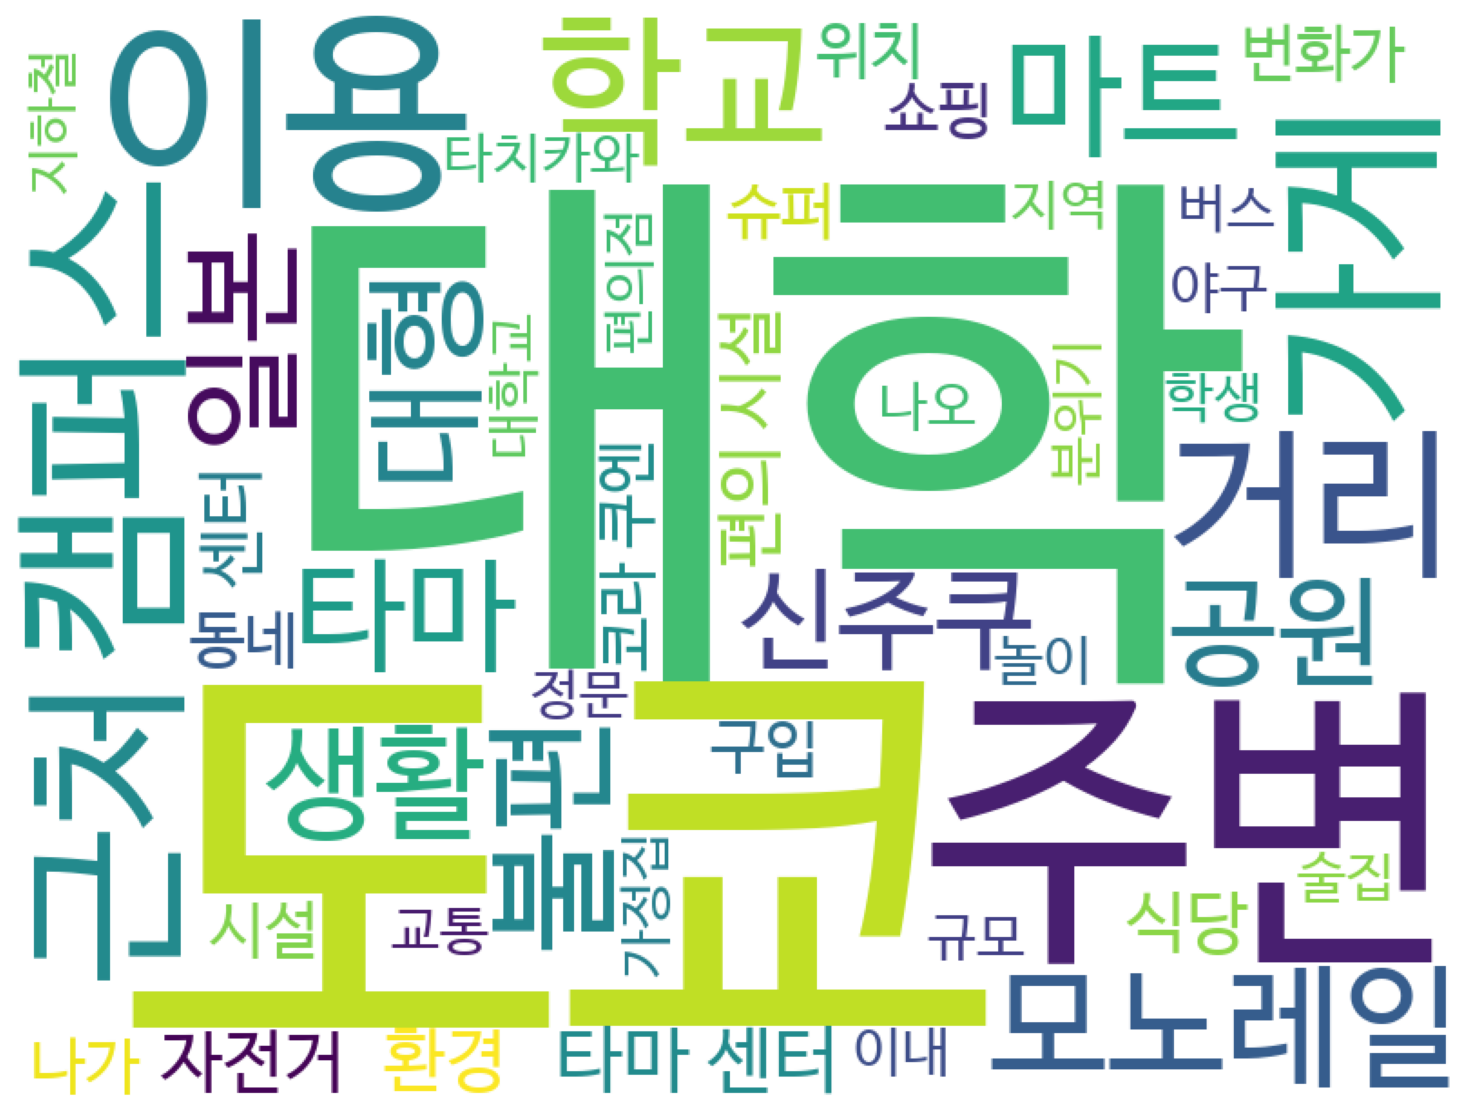

In [66]:
# 빈도수 별로 단어를 크게 표시한다
str_keywords = ' '.join(mecab_keywords)
mecab_wordcloud = wordcloud.generate(str_keywords)
mecab_wordcloud_fig = plt.figure(figsize = (15 , 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show() 

## use konlpy okt for tokenizing
### wordcloud generation considering frequency

In [48]:
from konlpy.tag import Okt
okt_tokenizer = Okt()

def okt_kor_tokenizer(raw, stopwords):
    # position arguments(or position tags): 내가 뽑아내고 싶은 형태소들
    twitter_pos = ["Noun", "Alpha", "Verb", "Number", "Adverb"]
    twitter_list = [
        word
        # normalize 그랰ㅋㅋ -> 그래ㅋㅋ  # stemming 바뀌나->바뀌다
        for word, tag in okt_tokenizer.pos(raw, norm=True, stem=True)
        if len(word) > 1 and tag in twitter_pos and word not in stopwords
    ]
    return twitter_list

# combine extracted noun and verb list without overlapping

In [49]:
okt_words = okt_kor_tokenizer(summary, stopwords_list)
okt_words[:10]

['도심', '떨어지다', '주변', '자연', '환경', '감상', '동물원', '열차', '내다', '아침']

In [58]:
# Okt divided nouns list term frequency
okt_words_counted = Counter(okt_words)
print("number of counted words:", len(okt_words_counted))
okt_words_counted.most_common(50)

number of counted words: 480


[('주변', 12),
 ('타마', 12),
 ('이용', 12),
 ('센터', 11),
 ('가게', 9),
 ('시설', 9),
 ('캠퍼스', 9),
 ('근처', 8),
 ('모노레일', 7),
 ('거리', 6),
 ('도쿄돔', 6),
 ('도쿄', 6),
 ('걸다', 6),
 ('대형', 6),
 ('마트', 6),
 ('호리다', 6),
 ('공원', 6),
 ('신주쿠', 6),
 ('환경', 5),
 ('나오다', 5),
 ('식당', 5),
 ('편의', 5),
 ('다니다', 5),
 ('자전거', 5),
 ('이다', 4),
 ('번화가', 4),
 ('위치', 4),
 ('오다', 4),
 ('일본', 4),
 ('동네', 4),
 ('나가다', 4),
 ('쇼핑', 4),
 ('게이오', 4),
 ('구입', 4),
 ('미나미', 4),
 ('슈퍼', 4),
 ('중고', 4),
 ('동물원', 3),
 ('들다', 3),
 ('이내', 3),
 ('지역', 3),
 ('치카', 3),
 ('가다', 3),
 ('지나다', 3),
 ('분위기', 3),
 ('야구', 3),
 ('교통', 3),
 ('놀이', 3),
 ('지하철', 3),
 ('술집', 3)]

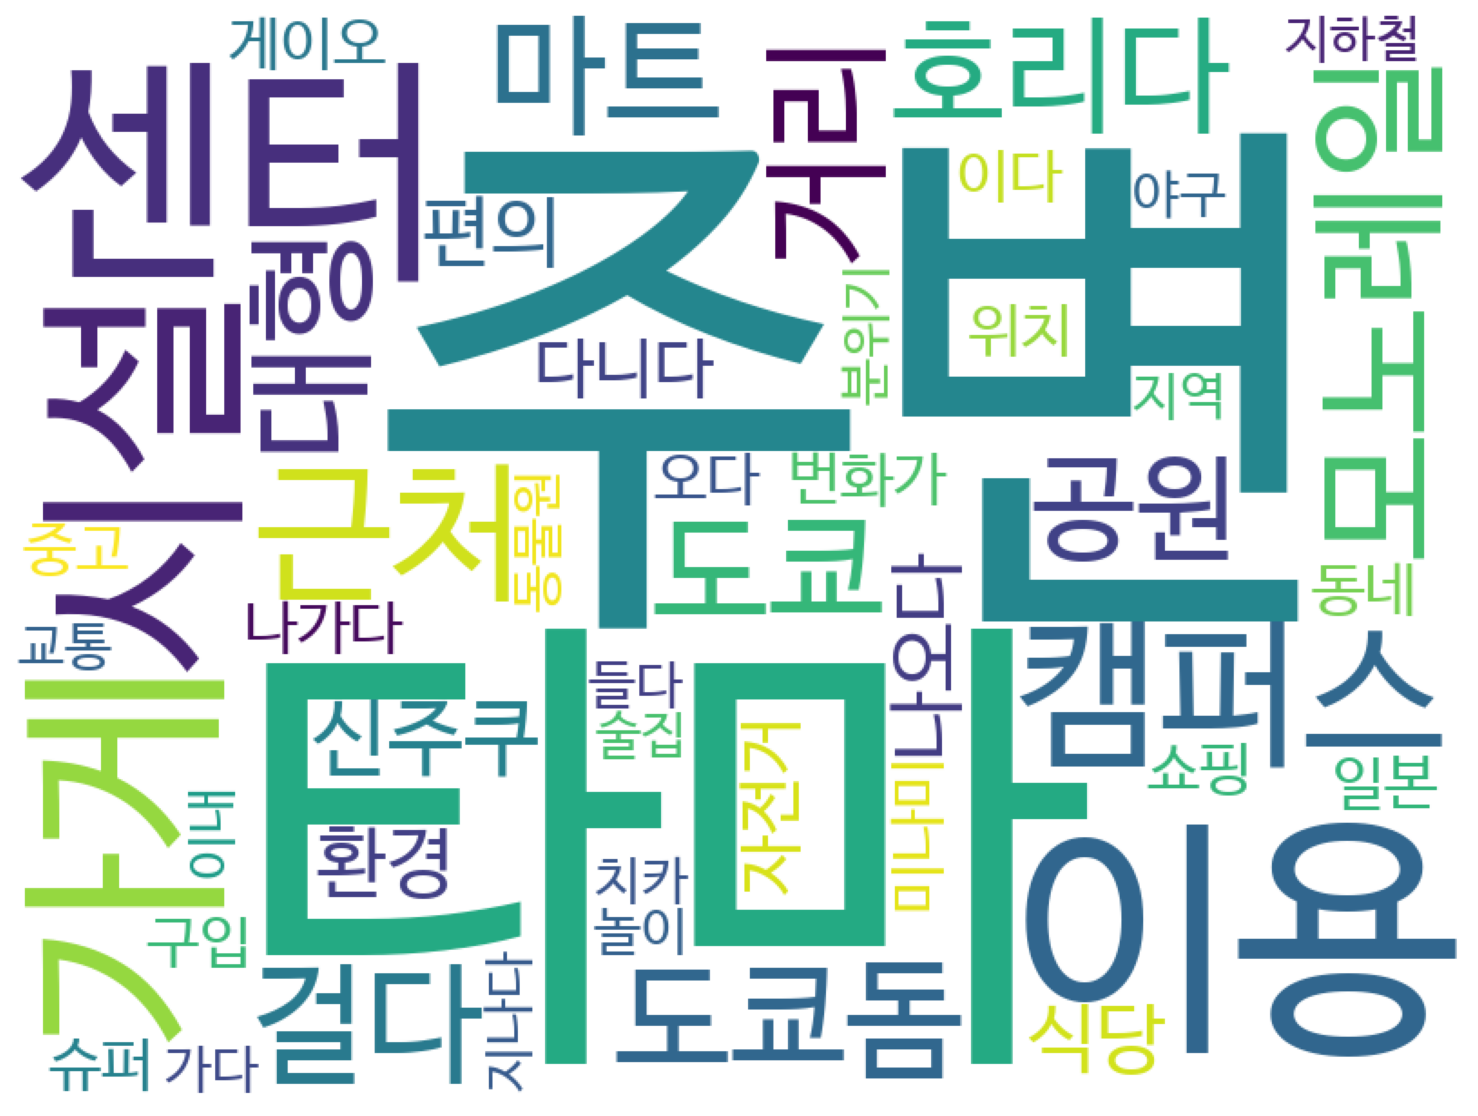

In [59]:
# 빈도수 별로 단어를 크게 표시한다
wordcloud.generate_from_frequencies(frequencies = okt_words_counted) # mecab으로 추출한 명사로 워드클라우드를 그린다.
plt.figure(figsize = (15 , 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show() 